In [5]:
# Statistical Modeling of Household Energy Consumption
##**Author:** Egide Dusengimana  
##**Objective:** To model the probabilistic nature of energy demand and simulate peak load risks using Monte Carlo methods.
##**Concepts Applied:** Normal Distribution, Central Limit Theorem, Probability Density Functions (PDF).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility (Sololearn best practice)
np.random.seed(42)

# Simulate 1000 households with an average daily consumption of 12kWh 
# and a standard deviation of 3.5kWh
mean_consumption = 12 
std_dev = 3.5
num_households = 1000

data = np.random.normal(mean_consumption, std_dev, num_households)
df = pd.DataFrame(data, columns=['Energy_kWh'])

print(f"Dataset generated for {num_households} households.")
print(df.describe())

Dataset generated for 1000 households.
        Energy_kWh
count  1000.000000
mean     12.067662
std       3.427256
min       0.655564
25%       9.733434
50%      12.088552
75%      14.267804
max      25.484560


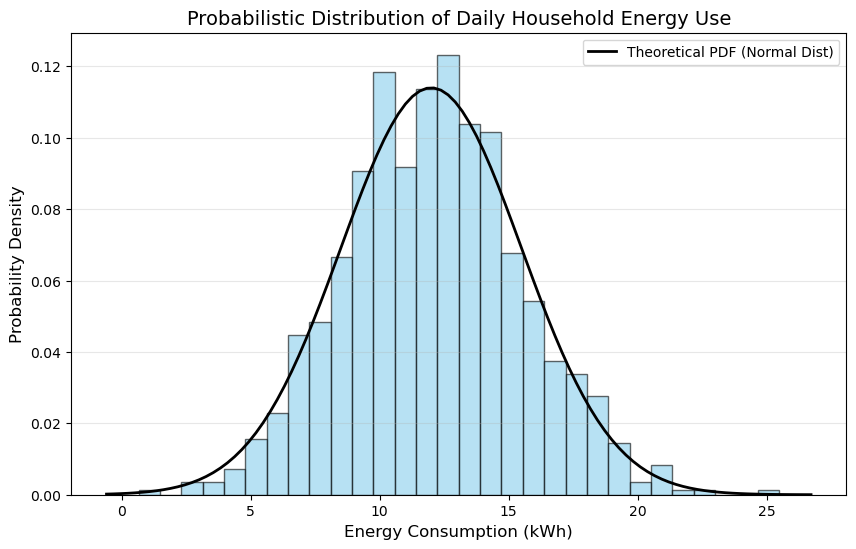

In [7]:
# Plotting the distribution of energy consumption
plt.figure(figsize=(10, 6))
plt.hist(df['Energy_kWh'], bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Overlaying the theoretical Normal Distribution (Probability Density Function)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_consumption, std_dev)

plt.plot(x, p, 'k', linewidth=2, label='Theoretical PDF (Normal Dist)')
plt.title('Probabilistic Distribution of Daily Household Energy Use', fontsize=14)
plt.xlabel('Energy Consumption (kWh)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

In [8]:
# Problem: What is the probability that total demand exceeds 12,500 kWh?
simulations = 10000
total_demands = []

for _ in range(simulations):
    # Simulate a random sample of 1000 households
    sample = np.random.normal(mean_consumption, std_dev, num_households)
    total_demands.append(np.sum(sample))

# Analyze results
risk_threshold = 12500
prob_exceeding = np.mean(np.array(total_demands) > risk_threshold)

print(f"Probability of Total Demand exceeding {risk_threshold} kWh: {prob_exceeding * 100:.2f}%")

Probability of Total Demand exceeding 12500 kWh: 0.00%
